In [63]:
import numpy as np
from collections import deque
import matplotlib.pyplot as plt

In [162]:
# Define the environment
grid_size = 4
n_states = grid_size * grid_size
n_actions = 4
goal_state = 15

actions = {'up': 0, 'down': 1, 'left': 2, 'right': 3}

# Define parameters
learning_rate0 = 0.8  # Initial learning rate
decay = 0.01  # Learning rate decay
discount_factor = 0.95
exploration_probability = 0.6
epochs = 400

#graph
max_q_values = []

#replay buffer
# buffer_size = 100  # Maximum size of the replay buffer
# batch_size = 32  # Number of samples to train on per epoch

In [163]:
def get_next_state(state, action):
    row, col = divmod(state, grid_size)
    if action == actions['up'] and row > 0:
        row -= 1
    elif action == actions['down'] and row < grid_size - 1:
        row += 1
    elif action == actions['left'] and col > 0:
        col -= 1
    elif action == actions['right'] and col < grid_size - 1:
        col += 1
    return row * grid_size + col

In [164]:
Q_table = np.zeros((n_states, n_actions))
# replay_buffer = deque(maxlen=buffer_size)

In [165]:
for epoch in range(epochs):
    current_state = np.random.randint(0, n_states)

    while current_state != goal_state:
        # Choose action with epsilon-greedy strategy
        if np.random.rand() < exploration_probability:
            action = np.random.randint(0, n_actions)  # Explore
        else:
            action = np.argmax(Q_table[current_state])  # Exploit

        # Simulate the environment (move to the next state)
        next_state = get_next_state(current_state, action)

        # Define a simple reward function (1 if the goal state is reached, 0 otherwise)
        reward = 1 if next_state == goal_state else -0.1

        # Store transition in the replay buffer
        # replay_buffer.append((current_state, action, reward, next_state))

        # Train using a random batch from the replay buffer
        # if len(replay_buffer) >= batch_size:
        #     batch = random.sample(replay_buffer, batch_size)
        #     for s, a, r, ns in batch:
        #         learning_rate = learning_rate0 / (1 + epoch * decay)
        #         Q_table[s, a] += learning_rate * \
        #                          (r + discount_factor * np.max(Q_table[ns]) - Q_table[s, a])

        # Update Q-value
        learning_rate = learning_rate0 / (1 + epoch * decay)
        Q_table[current_state, action] += learning_rate * \
                                          (reward + discount_factor *
                                           np.max(Q_table[next_state]) - Q_table[current_state, action])

        current_state = next_state  # Move to the next state

    max_q_values.append(np.average(Q_table))

In [166]:
print("\nQ-Table after Q-Learning:")
print(Q_table)


Q-Table after Q-Learning:
[[0.19866805 0.32134274 0.20409015 0.31781864]
 [0.31874911 0.44270109 0.19742021 0.44351875]
 [0.44339996 0.572125   0.32129208 0.57209754]
 [0.57202631 0.7075     0.44343776 0.57190589]
 [0.20428485 0.44351875 0.31840583 0.44275648]
 [0.32044376 0.57036901 0.31127629 0.572125  ]
 [0.44351512 0.7075     0.44351794 0.7075    ]
 [0.57212499 0.85       0.57212498 0.7075    ]
 [0.32094048 0.57158408 0.44326593 0.572125  ]
 [0.44341673 0.70749834 0.44351818 0.7075    ]
 [0.57212499 0.85       0.57212499 0.84999999]
 [0.7075     1.         0.70749999 0.85      ]
 [0.44179021 0.56809605 0.56873532 0.7075    ]
 [0.57211956 0.70749987 0.57212495 0.85      ]
 [0.7075     0.85       0.7075     1.        ]
 [0.         0.         0.         0.        ]]


In [167]:
optimal_policy = np.argmax(Q_table, axis=1)
print("\nOptimal Policy:")
print(optimal_policy)


Optimal Policy:
[1 3 1 1 1 3 3 1 3 3 1 1 3 3 3 0]


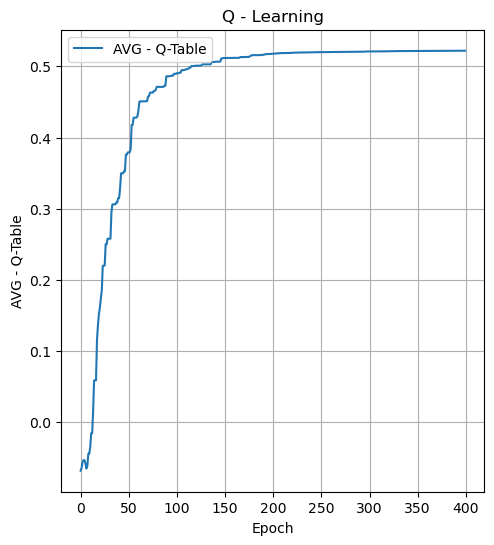

In [169]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(max_q_values, label='AVG - Q-Table')
plt.xlabel('Epoch')
plt.ylabel('AVG - Q-Table')
plt.title('Q - Learning')
plt.grid(True)
plt.legend()